<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 4</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:p.zilouchian@ut.ac.ir">Parham Zilouchian</a><br></font><br>
    </div>
</div>

# **Working with Database Systems**

In [240]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## **Part1 - EDA and Visualization**

#### **Section 1. Just some points :)**

In [2]:
sheets = ['بهار', 'تابستان', 'پاییز','زمستان' ]
birth_info = pd.DataFrame()
for i in range(1,11):
    x = f'9{i}'
    if i == 10:
        x = '1400'
    for season in sheets:
        df = pd.read_excel(f'Datasets//Part1//veladat-{x}.xlsx' , sheet_name=season ,engine='openpyxl')
        df.drop([0,1,2], axis=0, inplace=True)
        df.drop(['Unnamed: 0' , 'Unnamed: 2' ] , axis=1, inplace=True)
        df.rename(columns={'Unnamed: 1':'state' , 'Unnamed: 3':'male' , 'Unnamed: 4':'female'} , inplace=True)
        df['season'] = season
        df['year'] = int(x)
        df.reset_index(drop=True,inplace=True)
        birth_info = birth_info.append(df,ignore_index=True) 
birth_info['total'] = birth_info['male'] + birth_info['female']    
birth_info.drop(["Unnamed: 5", "Unnamed: 6"], axis=1, inplace=True)
birth_info.dropna(inplace=True)  
birth_info

,state,male,female,season,year,total
0,آذربايجان شرقي,8167,7800,بهار,91,15967
1,آذربايجان غربي,7861,7545,بهار,91,15406
2,اردبيل,3098,2918,بهار,91,6016
3,اصفهان,9663,9318,بهار,91,18981
4,البرز,4288,4060,بهار,91,8348
...,...,...,...,...,...,...
1290,مازندران,3622,3574,زمستان,1400,7196
1291,مركزي,1738,1672,زمستان,1400,3410
1292,هرمزگان,4062,4002,زمستان,1400,8064
1293,همدان,2970,2687,زمستان,1400,5657


In [3]:
birth_info['state'] = birth_info['state'].str.replace('ي','ی')
birth_info['state'] = birth_info['state'].str.replace('كهگیلویه وبویراحمد','کهگیلویه وبویراحمد')
birth_info['state'] = birth_info['state'].str.replace('مركزی','مرکزی')
birth_info['state'] = birth_info['state'].str.replace('كرمانشاه','کرمانشاه')
birth_info

,state,male,female,season,year,total
0,آذربایجان شرقی,8167,7800,بهار,91,15967
1,آذربایجان غربی,7861,7545,بهار,91,15406
2,اردبیل,3098,2918,بهار,91,6016
3,اصفهان,9663,9318,بهار,91,18981
4,البرز,4288,4060,بهار,91,8348
...,...,...,...,...,...,...
1290,مازندران,3622,3574,زمستان,1400,7196
1291,مرکزی,1738,1672,زمستان,1400,3410
1292,هرمزگان,4062,4002,زمستان,1400,8064
1293,همدان,2970,2687,زمستان,1400,5657


In [4]:
Iran_population = pd.read_csv("Datasets/Part1/Iran_population.csv")
Iran_population.rename(columns={'استان‌ها':'state', 'نفر':'population'}, inplace=True)
Iran_population['state'] = Iran_population['state'].str.replace('ي','ی')
Iran_population['state'] = Iran_population['state'].str.replace('كهگیلویه وبویراحمد','کهگیلویه وبویراحمد')
Iran_population['state'] = Iran_population['state'].str.replace('مركزی','مرکزی')
Iran_population['state'] = Iran_population['state'].str.replace('كرمانشاه','کرمانشاه')
Iran_population

,state,population
0,آذربایجان شرقی,4018000
1,آذربایجان غربی,3398000
2,اردبیل,1297000
3,اصفهان,5292000
4,البرز,2865000
5,ایلام,597000
6,بوشهر,1230000
7,تهران,13807000
8,چهارمحال وبختیاری,979000
9,خراسان جنوبی,809000


In [6]:
birth_year_info = pd.DataFrame(columns=['state','male','female','year','total'])
years = [91,92,93,94,95,96,97,98,99,1400]
states = list(birth_info['state'].unique())
for year in years:
    for state in states:
        rows = birth_info[(birth_info['state'] == state) & (birth_info['year'] == year)]
        row = {'state': state, 'male': rows['male'].sum(), 'female': rows['female'].sum() ,'year': year, 'total': rows['total'].sum()}
        birth_year_info = birth_year_info.append(row, ignore_index = True) 
        
birth_year_info

,state,male,female,year,total
0,آذربایجان شرقی,35301,33367,91,68668
1,آذربایجان غربی,32240,30565,91,62805
2,اردبیل,12630,11971,91,24601
3,اصفهان,39922,38328,91,78250
4,البرز,18303,17340,91,35643
...,...,...,...,...,...
305,مازندران,15599,14604,1400,30203
306,مرکزی,7337,6975,1400,14312
307,هرمزگان,16698,16080,1400,32778
308,همدان,12049,10987,1400,23036


### *ERD of the Databaseis also included in the Zip file (we added Iran_population data as a table too).*


In [195]:
# host ="localhost"
# database = "birth_information"
# user = "postgres"
# password = "1234"
# connection_string = f"postgres://{user}:{password}@{host}/{database}"

def connect(host ="localhost", database = "birth_information", user = "postgres", password = "1234"):
  return psycopg2.connect(database = database , user = user, password = password , host = host)

In [8]:
def create_table():

  commands = (
      """
      CREATE TABLE IF NOT EXISTS iran_population(
        state_id SERIAL,
        population INTEGER NOT NULL,
        state VARCHAR(20),
        PRIMARY KEY(state_id)
      )
      """
      ,
      """
      CREATE TABLE IF NOT EXISTS birth_annual_info(
        birth_annual_id SERIAL,
        state_id INTEGER NOT NULL,
        total INTEGER NOT NULL,
        female INTEGER NOT NULL,
        male INTEGER NOT NULL,
        year INTEGER NOT NULL,
        PRIMARY KEY(birth_annual_id),
        FOREIGN KEY(state_id)
        REFERENCES iran_population(state_id)
      )
      """
      ,
      """
      CREATE TABLE IF NOT EXISTS birth_seasonal_info(
        birth_seasonal_id SERIAL,
        state_id INTEGER NOT NULL,
        total INTEGER NOT NULL,
        female INTEGER NOT NULL,
        male INTEGER NOT NULL,
        year INTEGER NOT NULL,
        season VARCHAR(20) NOT NULL,
        PRIMARY KEY(birth_seasonal_id),
        FOREIGN KEY(state_id)
        REFERENCES iran_population(state_id)
      )
      """

  )

  conn = None
  try:
    conn = connect()
    cursor = conn.cursor()
    for command in commands:
      cursor.execute(command)
    cursor.close()
    conn.commit()
  except(Exception,psycopg2.DatabaseError) as error:
    print(error)
  finally:
    if conn is not None:
      conn.close()

In [9]:
create_table()

In [10]:
def insert_data_in_tables():
    try:
        conn = connect()
        cursor = conn.cursor()
        for idx in Iran_population.index:
            cursor.execute('INSERT INTO iran_population (state,population) VALUES (%s, %s)', (Iran_population.loc[idx,'state'],int(Iran_population.loc[idx,'population'])))
        conn.commit()
        
        for idx in birth_info.index:
            cursor = conn.cursor()
            cursor.execute('INSERT INTO birth_seasonal_info (state_id,total,male,female,year,season) VALUES (%s, %s, %s, %s, %s, %s)', (states.index(birth_info.loc[idx,'state'])+1,int(birth_info.loc[idx,'total']),int(birth_info.loc[idx,'male']),int(birth_info.loc[idx,'female']),int(birth_info.loc[idx,'year']),birth_info.loc[idx,'season']))
        conn.commit()
        
        for idx in birth_year_info.index:
            cursor = conn.cursor()
            cursor.execute('INSERT INTO birth_annual_info (state_id,total,male,female,year) VALUES (%s, %s, %s, %s, %s)', (states.index(birth_year_info.loc[idx,'state'])+1,int(birth_year_info.loc[idx,'total']),int(birth_year_info.loc[idx,'male']),int(birth_year_info.loc[idx,'female']),int(birth_year_info.loc[idx,'year'])))
        cursor.close()
        conn.commit()
    except(Exception,psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

In [11]:
insert_data_in_tables()

#### **Section 2. Write Query using Psycopg2**

```
# This is formatted as code
```


In [203]:
def get_query_results(query):
    with connect() as connection:
        with connection.cursor() as cursor:
            cursor.execute(query)
            return cursor.fetchall()

##### **a. Total births**

In [205]:
IRAN_TOTAL_BIRTH_EACH_YEAR = """
SELECT SUM(total), year
FROM birth_annual_info
GROUP BY year
ORDER BY year 
"""
def create_bar_chart_from_db(query_result):
  plt.style.use('ggplot')
  figure = plt.figure(figsize=(9,5))
  axes = figure.add_subplot(1,1,1)
  axes.bar(
            range(len(query_result)),
            [qr[0] for qr in  query_result],
            tick_label = [qr[1] for qr in  query_result])
  plt.xticks(rotation = 30, ha= 'right')
  plt.title('Number of births per year in Iran')
  plt.xlabel('Year')
  plt.ylabel('Birth Count')
  plt.show()
  
birth_count = get_query_results(IRAN_TOTAL_BIRTH_EACH_YEAR)
birth_count

[(1421576, 91),
 (1471747, 92),
 (1534307, 93),
 (1570177, 94),
 (1528000, 95),
 (1487860, 96),
 (1366496, 97),
 (1196132, 98),
 (1114118, 99),
 (1116211, 1400)]

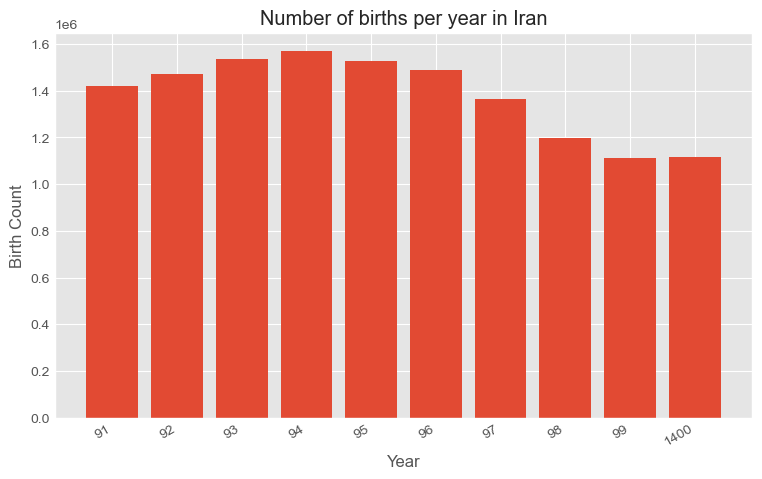

In [39]:
create_bar_chart_from_db(birth_count)

### we see an increasing pattern in the numbber of births from 1391 to 1394, with 1394 having the most number of births compared to the previous & following years. after 1394, there is a significant decrease in the number of births per year. this decreasing pattern can be due to the difficult financial & welfare situation in Iran that causes people to have little hope for marriage & starting a family and as a result have babies.<br>from the looks of this figure, we might expect a decreasing pattern in the number of births in the following years.<br>It's worth mentioning that the statistical significance of birth rate in 1395 can be tested against other years.

##### **b. Total births divide by gender**

In [207]:
IRAN_TOTAL_BIRTH_EACH_YEAR_BY_SEX = """
SELECT SUM(male),SUM(female), year
FROM birth_seasonal_info
GROUP BY year
ORDER BY year 
"""
birth_count_sex = pd.DataFrame(get_query_results(IRAN_TOTAL_BIRTH_EACH_YEAR_BY_SEX),columns=['male','female','year'])
birth_count_sex

,male,female,year
0,729238,692338,91
1,755797,715950,92
2,788618,745689,93
3,806434,763743,94
4,786095,741905,95
5,766107,721753,96
6,704018,662478,97
7,616496,579636,98
8,575162,538956,99
9,575958,540253,1400


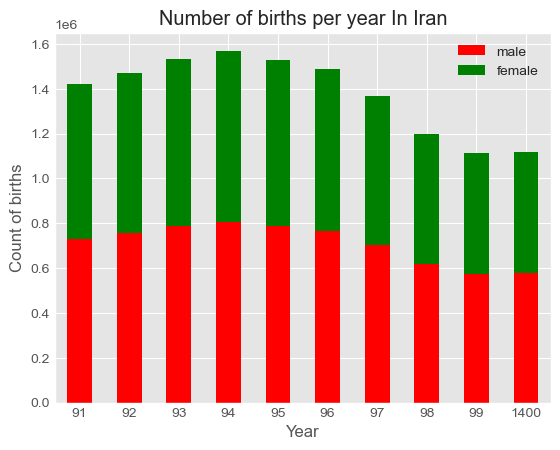

In [61]:
# birth_count_sex.index = birth_count_sex.year
# birth_count_sex.drop(['year'],axis=1,inplace=True)
birth_count_sex.plot(kind='bar', stacked=True, color=['red','green'])
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('Count of births')
plt.title('Number of births per year In Iran');

### Overall it seems that the rate of births by gender are almost equal in each year (almost 50-50). so, the rate of female births & male births each,follow the same pattern mentioned in the previous section (for the total rate).

##### **c. Most births in last five years**

In [208]:
MOST_BIRTH_PER_STATE_IN_LAST_5_YEARS = """
SELECT y.state, y.total
FROM
(SELECT SUM(x.total) AS total ,x.state
FROM
(SELECT SUM(a.total) AS total, a.state
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year
HAVING a.year >= 96
ORDER BY total DESC) AS x
GROUP BY x.state) AS y
ORDER by y.total DESC
LIMIT 5
"""  
most_birth_count_in_last_5 = pd.DataFrame(get_query_results(MOST_BIRTH_PER_STATE_IN_LAST_5_YEARS),columns=['state','total'])
most_birth_count_in_last_5

,state,total
0,تهران,824446
1,خراسان رضوی,607204
2,خوزستان,504167
3,سیستان وبلوچستان,453979
4,فارس,344294


In [237]:
import arabic_reshaper
from bidi.algorithm import get_display
def format_states(states_subset):
    formatted_states = []
    for i in states_subset:
        reshaped_text = arabic_reshaper.reshape(i)
        formatted_states.append(get_display(reshaped_text))
    return formatted_states

In [177]:
def plot_query_c1():
    formatted_states = format_states(most_birth_count_in_last_5.state)
    plt.xticks(rotation = 0)
    plt.bar(formatted_states,most_birth_count_in_last_5.total)
    plt.xlabel('State')
    plt.ylabel('Total births in the last 5 years')
    plt.title('top 5 states with the most birth count in the last 5 years');

In [209]:
MOST_BIRTH_PER_STATE_BY_SEX_IN_LAST_5_YEARS = """
SELECT *
FROM
(SELECT  x.state,SUM(x.male_total) AS male_total ,SUM(x.female_total) AS female_total
FROM
(SELECT SUM(a.male) AS male_total,SUM(a.female) AS female_total, a.state
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year
HAVING a.year >= 96) AS x
GROUP BY x.state) AS y
ORDER by (y.male_total + y.female_total) DESC
LIMIT 5 
"""
most_birth_count_by_sex_in_last_5 = pd.DataFrame(get_query_results(MOST_BIRTH_PER_STATE_BY_SEX_IN_LAST_5_YEARS),columns=['state','male','female'])
most_birth_count_by_sex_in_last_5

,state,male,female
0,تهران,425595,398851
1,خراسان رضوی,311328,295876
2,خوزستان,258648,245519
3,سیستان وبلوچستان,232894,221085
4,فارس,177511,166783


In [179]:
most_birth_count_by_sex_in_last_5['male']=most_birth_count_by_sex_in_last_5['male'].astype(int)
most_birth_count_by_sex_in_last_5['female']=most_birth_count_by_sex_in_last_5['female'].astype(int)
most_birth_count_by_sex_in_last_5.index = format_states(most_birth_count_by_sex_in_last_5.state)
most_birth_count_by_sex_in_last_5.drop(['state'],axis=1,inplace=True)

In [180]:

def plot_query_c2():
    most_birth_count_by_sex_in_last_5.plot(kind='bar', stacked=True, color=['red','green'])
    plt.xticks(rotation = 0)
    plt.xlabel('State')
    plt.ylabel('Total births in the last 5 years')
    plt.title('Top 5 states with the most birth count in the last 5 year');

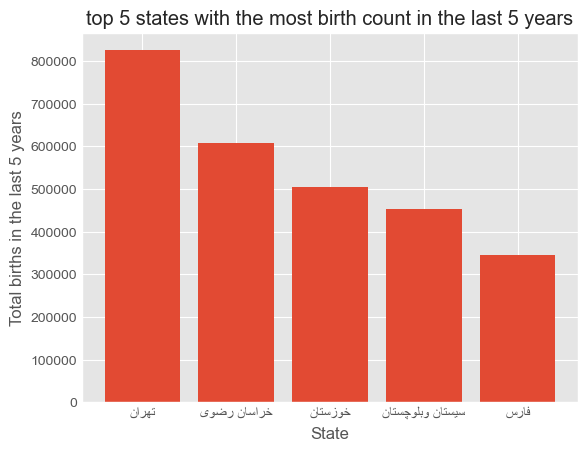

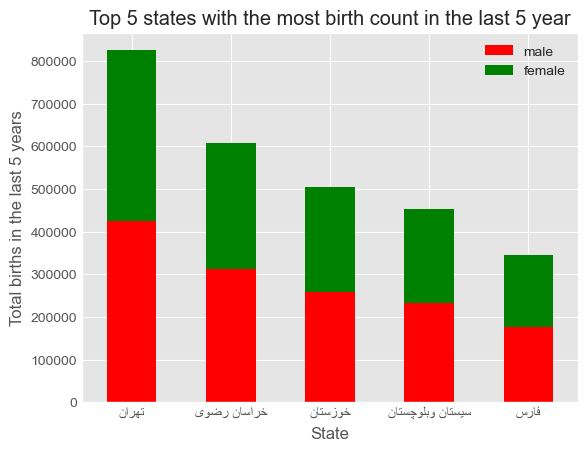

In [181]:
plot_query_c1()
plot_query_c2()

### by looking at the above figures, we see that *Tehran* has the highest number of births in the last 5 years(aggregated) by a comparatively large margin with respect to the other 4 states.<br>The figures actually make sense because *Tehran* & *Khorasan Razavi* & *Fars* & *Khoozestan* are some of the most populated states in Iran (they are top5). *Sistan va Baloochestan* is the 10th most populated state in Iran, so it seems that in this state the average number of children per family is higher than the whole country's average(i.e. people have more children in *Khoozestan*).<br> the 5th state with the highest birth count is *Fars* and its birth count is less than half the amount of Tehran's.this shows the siginifcance of birth count in *Tehran*.<br> for comparing the number of boy births versus girl births, the proportion is approximately equal(in all states, the boys count is a little higher than the girls count). so the explanations for the whole birth count also applies to each gender.

##### **d. Least births in last five years**

In [210]:
LEAST_BIRTH_PER_STATE_IN_LAST_5_YEARS = """
SELECT y.state, y.total
FROM
(SELECT SUM(x.total) AS total ,x.state
FROM
(SELECT SUM(a.total) AS total, a.state
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year
HAVING a.year >= 96
ORDER BY total) AS x
GROUP BY x.state) AS y
ORDER by y.total
LIMIT 5
"""
least_birth_count_in_last_5 = pd.DataFrame(get_query_results(LEAST_BIRTH_PER_STATE_IN_LAST_5_YEARS),columns=['state','total'])
least_birth_count_in_last_5

,state,total
0,سمنان,42295
1,ایلام,44805
2,کهگیلویه وبویراحمد,62959
3,خراسان شمالی,78264
4,خراسان جنوبی,79867


In [183]:
def plot_query_d1():
    formatted_states = format_states(least_birth_count_in_last_5.state)
    plt.xticks(rotation = 0)
    plt.bar(formatted_states,least_birth_count_in_last_5.total)
    plt.xlabel('State')
    plt.ylabel('Total births in the last 5 years')
    plt.title('top 5 states with the least birth count in the last 5 years');

In [211]:
LEAST_BIRTH_PER_STATE_BY_SEX_IN_LAST_5_YEARS = """
SELECT *
FROM
(SELECT  x.state,SUM(x.male_total) AS male_total ,SUM(x.female_total) AS female_total
FROM
(SELECT SUM(a.male) AS male_total,SUM(a.female) AS female_total, a.state
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year
HAVING a.year >= 96) AS x
GROUP BY x.state) AS y
ORDER by (y.male_total + y.female_total)
LIMIT 5 
"""  
least_birth_count_by_sex_in_last_5 = pd.DataFrame(get_query_results(LEAST_BIRTH_PER_STATE_BY_SEX_IN_LAST_5_YEARS),columns=['state','male','female'])
least_birth_count_by_sex_in_last_5

,state,male,female
0,سمنان,21669,20626
1,ایلام,23346,21459
2,کهگیلویه وبویراحمد,32558,30401
3,خراسان شمالی,40348,37916
4,خراسان جنوبی,41180,38687


In [185]:
least_birth_count_by_sex_in_last_5['male']=least_birth_count_by_sex_in_last_5['male'].astype(int)
least_birth_count_by_sex_in_last_5['female']=least_birth_count_by_sex_in_last_5['female'].astype(int)
least_birth_count_by_sex_in_last_5.index = format_states(least_birth_count_by_sex_in_last_5.state)
least_birth_count_by_sex_in_last_5.drop(['state'],axis=1,inplace=True)

In [186]:
def plot_query_d2():
    least_birth_count_by_sex_in_last_5.plot(kind='bar', stacked=True, color=['red','green'])
    plt.xticks(rotation = 0)
    plt.xlabel('State')
    plt.ylabel('Total births in the last 5 years')
    plt.title('Top 5 states with the least birth count in the last 5 year');

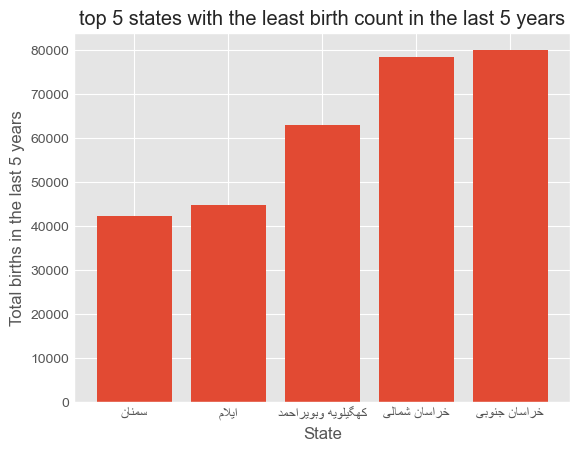

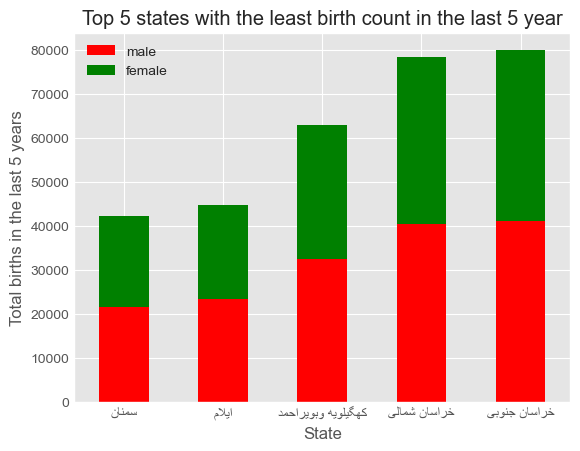

In [187]:
plot_query_d1()
plot_query_d2()

### the 5 states having the least number of births are actually the 5 states with the lowest population. so the figures compeletly make sense.<br>*Ilam* and *Semnan*'s birth counts are close, while *Khorasan Razavi* and *Khorasan Jonoobi*'s birth counts are close. and *Kohgilooye va Boyer Ahmad* is somewhere in between these 2 groups.<br>Like the previous query, the birth count of male vs female is approximatly equal (and like the previous query, in all of these 5 states the number of boy births is slightly higher than the number of girl births).

##### **e. Most Birth-rate**

#### *Iran_population* data was loaded in Part1. we use the dataframe "Iran_population" here

In [212]:
QUERY_E = """
SELECT y.state, y.birth_rate
FROM
(SELECT SUM(x.total)/x.population AS birth_rate ,x.state
FROM
(SELECT SUM(a.total) AS total, a.state , a.population
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year, a.population
HAVING a.year >= 96
ORDER BY total DESC) AS x
GROUP BY x.state,x.population) AS y
ORDER by y.birth_rate DESC
LIMIT 5
"""
most_birth_rate_in_last_5 = pd.DataFrame(get_query_results(QUERY_E),columns=['state','birth_rate'])
most_birth_rate_in_last_5

,state,birth_rate
0,سیستان وبلوچستان,0.15244425789120214909
1,خوزستان,0.10320716479017400205
2,خراسان جنوبی,0.09872311495673671199
3,هرمزگان,0.09381072555205047319
4,خراسان رضوی,0.08971690307328605201


In [164]:
def plot_query_e1():
    formatted_states = format_states(most_birth_rate_in_last_5.state)
    plt.xticks(rotation = 0)
    plt.bar(formatted_states,most_birth_rate_in_last_5.birth_rate)
    plt.xlabel('State')
    plt.ylabel('birth rate in the last 5 years')
    plt.title('top 5 states with the most birth rate in the last 5 years');

In [213]:
QUERy_E2 = """
SELECT *
FROM
(SELECT  x.state,(SUM(x.male_total)/x.population) AS male_total ,(SUM(x.female_total)/x.population) AS female_total
FROM
(SELECT SUM(a.male) AS male_total,SUM(a.female) AS female_total, a.state, a.population
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year , a.population
HAVING a.year >= 96) AS x
GROUP BY x.state, x.population) AS y
ORDER by (y.male_total + y.female_total) DESC
LIMIT 5 
"""  
most_birth_rate_by_sex_in_last_5 = pd.DataFrame(get_query_results(QUERy_E2),columns=['state','male','female'])
most_birth_rate_by_sex_in_last_5

,state,male,female
0,سیستان وبلوچستان,0.07820483546004029550,0.07423942243116185359
1,خوزستان,0.05294738996929375640,0.05025977482088024565
2,خراسان جنوبی,0.05090234857849196539,0.04782076637824474660
3,هرمزگان,0.04806677181913774974,0.04574395373291272345
4,خراسان رضوی,0.04600000000000000000,0.04371690307328605201


In [166]:
most_birth_rate_by_sex_in_last_5['male']=most_birth_rate_by_sex_in_last_5['male'].astype(float)
most_birth_rate_by_sex_in_last_5['female']=most_birth_rate_by_sex_in_last_5['female'].astype(float)
most_birth_rate_by_sex_in_last_5.index = format_states(most_birth_rate_by_sex_in_last_5.state)
most_birth_rate_by_sex_in_last_5.drop(['state'],axis=1,inplace=True)

In [168]:
def plot_query_e2():
    most_birth_rate_by_sex_in_last_5.plot(kind='bar', stacked=True, color=['red','green'])
    plt.xticks(rotation = 0)
    plt.xlabel('State')
    plt.ylabel('birth rate in the last 5 years')
    plt.title('top 5 states with the most birth rate in the last 5 years');

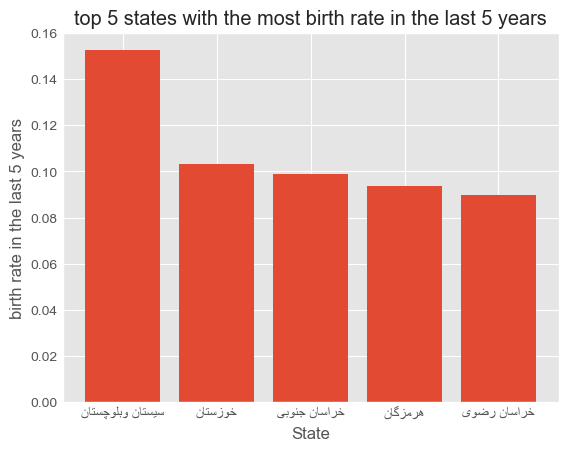

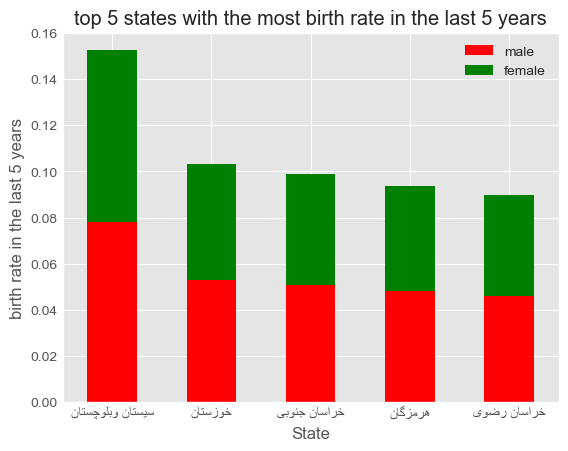

In [169]:
plot_query_e1()
plot_query_e2()

### what seems interesting here is that, our previous hypothesis about the birth rate in *Sistan va Baloochestan* is proven here (we said that people have more children in *Sistan va Baloochestan*). *Sistan va Baloochestan* & *Khorasan Razavi* & *Khoozestan* were among the states with the highest birth counts in the last 5 yeasr. they also appeared in this list, so we can sate the previous hypothesis about all of them (hypothesis: there are more children per family in these states). in terms of birth rate analysis by gender, the previous query's statement also holds true (female birth rate and male birth rates are almost equal with male rates being slightly higher).

In [214]:
QUERY_F = """
SELECT y.state, y.birth_rate
FROM
(SELECT SUM(x.total)/x.population AS birth_rate ,x.state
FROM
(SELECT SUM(a.total) AS total, a.state , a.population
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year, a.population
HAVING a.year >= 96
ORDER BY total) AS x
GROUP BY x.state,x.population) AS y
ORDER by y.birth_rate
LIMIT 5
"""  
least_birth_rate_in_last_5 = pd.DataFrame(get_query_results(QUERY_F),columns=['state','birth_rate'])
least_birth_rate_in_last_5

,state,birth_rate
0,گیلان,0.04733723653395784543
1,مازندران,0.05291471025260029718
2,البرز,0.05365794066317626527
3,سمنان,0.05639333333333333333
4,مرکزی,0.05676209952283571915


In [171]:
def plot_query_f1():
    formatted_states = format_states(least_birth_rate_in_last_5.state)
    plt.xticks(rotation = 0)
    plt.bar(formatted_states,least_birth_rate_in_last_5.birth_rate)
    plt.xlabel('State')
    plt.ylabel('birth rate in the last 5 years')
    plt.title('top 5 states with the least birth rate in the last 5 years');

In [215]:
QUERy_F2 = """
SELECT *
FROM
(SELECT x.state,(SUM(x.male_total)/x.population) AS male_total ,(SUM(x.female_total)/x.population) AS female_total
FROM
(SELECT SUM(a.male) AS male_total,SUM(a.female) AS female_total, a.state, a.population
FROM (birth_annual_info NATURAL JOIN iran_population) AS a
GROUP BY a.state, a.year , a.population
HAVING a.year >= 96) AS x
GROUP BY x.state, x.population) AS y
ORDER by (y.male_total + y.female_total)
LIMIT 5 
"""
least_birth_rate_by_sex_in_last_5 = pd.DataFrame(get_query_results(QUERy_F2),columns=['state','male','female'])
least_birth_rate_by_sex_in_last_5

,state,male,female
0,گیلان,0.02439812646370023419,0.02293911007025761124
1,مازندران,0.02723001485884101040,0.02568469539375928678
2,البرز,0.02782164048865619546,0.02583630017452006981
3,سمنان,0.02889200000000000000,0.02750133333333333333
4,مرکزی,0.02913496932515337423,0.02762713019768234492


In [173]:
least_birth_rate_by_sex_in_last_5['male']=least_birth_rate_by_sex_in_last_5['male'].astype(float)
least_birth_rate_by_sex_in_last_5['female']=least_birth_rate_by_sex_in_last_5['female'].astype(float)
least_birth_rate_by_sex_in_last_5.index = format_states(least_birth_rate_by_sex_in_last_5.state)
least_birth_rate_by_sex_in_last_5.drop(['state'],axis=1,inplace=True)


In [174]:
def plot_query_f2():
    least_birth_rate_by_sex_in_last_5.plot(kind='bar', stacked=True, color=['red','green'])
    plt.xticks(rotation = 0)
    plt.xlabel('State')
    plt.ylabel('birth rate in the last 5 years')
    plt.title('top 5 states with the least birth rate in the last 5 years');

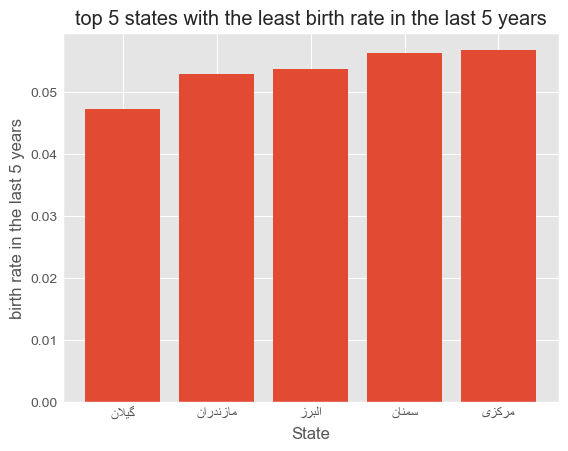

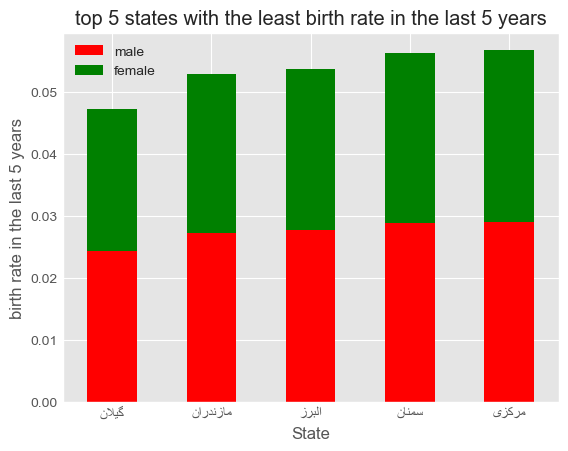

In [175]:
plot_query_f1()
plot_query_f2()

### *Gilan* has the lowest birth rate in the last 5 years. among these states, only *Semnan* was one the states with the lowest birth count.so it seems that the low count of births in those 4 other states (the states with the least birth count) were somehow proportionate to their population.<br>

##### **g. Birth number and rate in each season!**

In [252]:
QUERY_G = """
SELECT x.year,x.season, x.male_count , x.female_count, (1.0*x.male_count/x.population) as male_rate, (1.0*x.female_count/x.population) as female_rate
FROM
(SELECT SUM(a.male) AS male_count,SUM(a.female) AS female_count, SUM(a.population) AS population ,a.season, a.year
FROM (birth_seasonal_info NATURAL JOIN iran_population) AS a
GROUP BY a.year, a.season
HAVING a.year >= 96) AS x
ORDER BY (x.male_count + x.female_count) DESC
"""
query_g = pd.DataFrame(get_query_results(QUERY_G),columns=['year','season','male_count','female_count','male_rate','female_rate'])
query_g

,year,season,male_count,female_count,male_rate,female_rate
0,96,تابستان,201822,189473,0.00242939512488715017,0.00228074631357207343
1,96,پاییز,192072,181838,0.00231203129702076437,0.00218884140836593440
2,96,بهار,192269,180772,0.00231440264820944929,0.00217600962985254288
3,97,تابستان,187024,175291,0.00225126692747517304,0.00211003310261811616
4,96,زمستان,179944,169670,0.00216604273247065904,0.00204237135118868492
5,97,بهار,177373,167138,0.00213509479386096900,0.00201189286789046043
6,97,پاییز,174535,164794,0.00210093289196509178,0.00198367739993981342
7,97,زمستان,165086,155255,0.00198719229611796569,0.00186885344568161300
8,98,تابستان,162287,152883,0.00195349984953355402,0.00184030093289196509
9,99,تابستان,155227,144807,0.00186851640084261210,0.00174308757147156184


In [267]:
gdf = query_g.groupby('year')
gdf.get_group(96)

,year,season,male_count,female_count,male_rate,female_rate
0,96,تابستان,201822,189473,0.00242939512488715017,0.00228074631357207343
1,96,پاییز,192072,181838,0.00231203129702076437,0.00218884140836593440
2,96,بهار,192269,180772,0.00231440264820944929,0.00217600962985254288
4,96,زمستان,179944,169670,0.00216604273247065904,0.00204237135118868492


In [268]:
def plot_query_g1(year):
    seasons = format_states(['بهار','تابستان','پاییز','زمستان'])
    temp = (gdf.get_group(year))
    temp = temp[['year','season','male_count','female_count']]
    temp['season'] = format_states(temp.season)
    temp.index = temp.season
    temp = temp.drop(['year'],axis=1)
    temp = temp.drop(['season'],axis=1)
    x_axis = np.arange(len(temp))
    temp = temp.reindex(seasons)
    temp.plot(kind='bar', stacked=True, color=['red','green'])
    plt.xticks(x_axis,seasons,rotation = 0)
    plt.xlabel('season')
    plt.ylabel('birth count')
    plt.title(f'birth count per season in {year}');

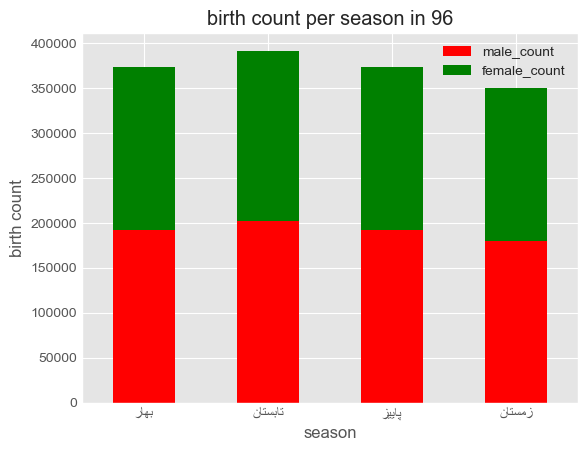

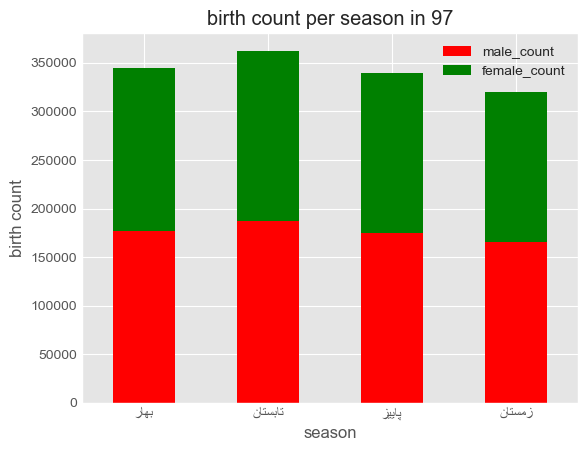

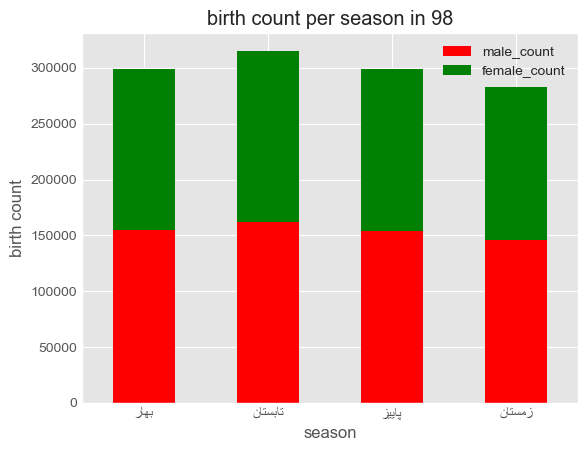

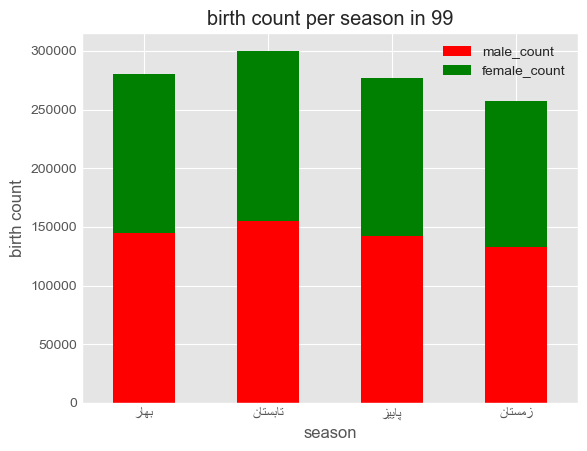

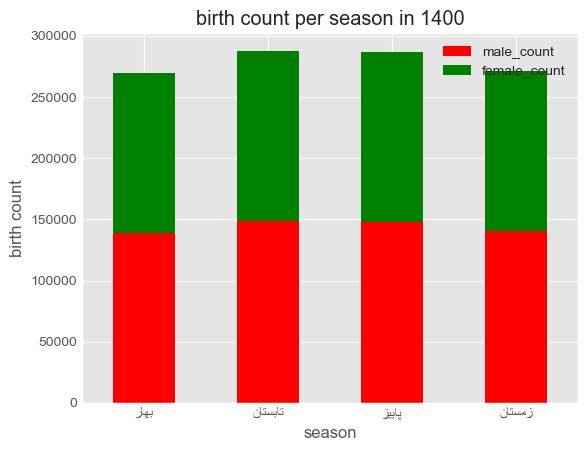

In [269]:
for i in [96,97,98,99,1400]:
    plot_query_g1(i)

### in all of the above figures we see that we have the most number of births in Summer, and the lowest number of births in the Winter(except 1400, in which we had the least number of births in the Spring).<br>Since I couldn't find a logical explanation for this phenomenon, I searched the net and found that this is common, that babies tend to appear in summer and early autumn.<br>there are multiple explanations for it, like:<br>One evolutionary theory suggests that by making babies in the fall and winter, they’ll be born at a time of year when food is more available — and that gives offspring a better chance of surviving. This could explain why sperm tend to be healthier and stronger in the winter months.<br>Also, by  comparing the figures of different years, we see that the number of births are decresing from 1396 to 1400(we covered this part in the figure for Query of part a)

In [272]:
def plot_query_g2(year):
    seasons = format_states(['بهار','تابستان','پاییز','زمستان'])
    temp = (gdf.get_group(year))
    temp = temp[['year','season','male_rate','female_rate']]
    temp['male_rate']=temp['male_rate'].astype(float)
    temp['female_rate']=temp['female_rate'].astype(float)
    temp['season'] = format_states(temp.season)
    temp.index = temp.season
    temp = temp.drop(['year'],axis=1)
    temp = temp.drop(['season'],axis=1)
    x_axis = np.arange(len(temp))
    temp = temp.reindex(seasons)
    temp.plot(kind='bar', stacked=True, color=['red','green'])
    plt.xticks(x_axis,seasons,rotation = 0)
    plt.xlabel('season')
    plt.ylabel('birth rate')
    plt.title(f'birth rate per season in {year}');

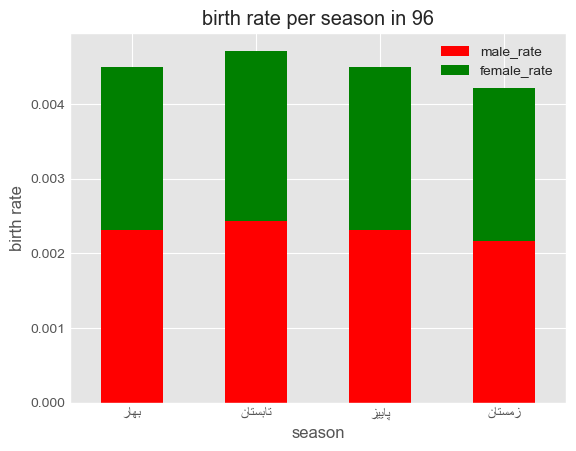

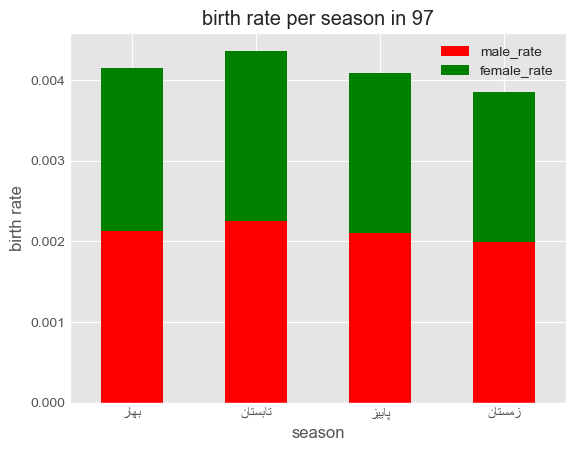

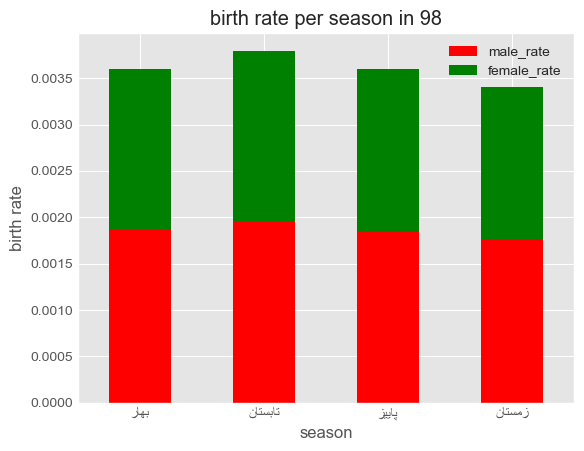

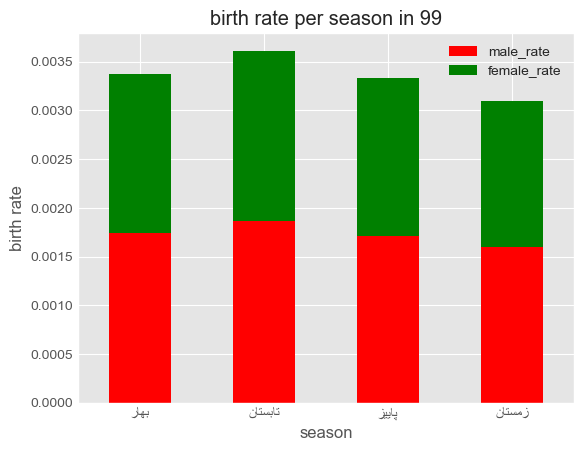

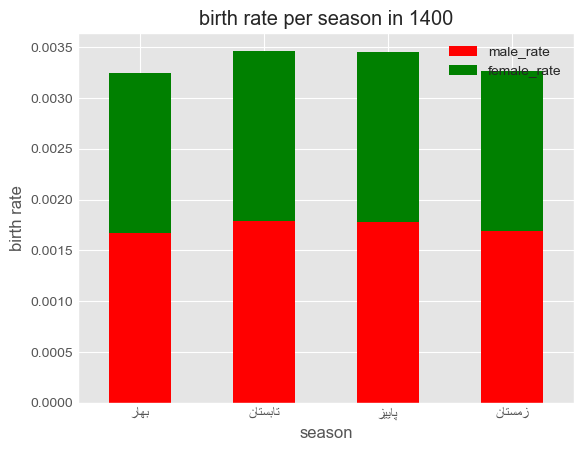

In [273]:
for i in [96,97,98,99,1400]:
    plot_query_g2(i)

### the birth rate figures are almost identical to the birth count figures. the explanations for the birth count figures also hold true for these figures.

# Question 3

### The main purpose that cursors fulfill is traversing of the row set. Cursor requires a network roundtrip each time it fetches a record, thus consume network resources. While data processing, it issues locks on part of the table, or on the whole table.<br><br>Some of the   disadvantages of cursors are:<br>1. Uses more resources because Each time you fetch a row from the cursor, it results in a network roundtrip<br>2. There are restrictions on the SELECT statements that can be used.<br>3. Because of the round trips, performance and speed is slow.<br><br>Cursors can be best avoided by:<br>a. Using the SQL while loop: Using a while loop we can insert the result set into the temporary table.<br>b. User defined functions : Cursors are sometimes used to perform some calculation on the resultant row set. This cam also be achieved by creating a user defined function to suit the needs<br><br>Here are some alternatives to using a cursor:<br>1. Use WHILE LOOPS<br>2. Use temp tables<br>3. Use derived tables<br>4. Use correlated sub-queries<br>5. Use the CASE statement<br>6. Perform multiple queries

## **Part2 - Working with QGIS**

#### **Section A: Load Data**

#### **Section B: Answer Questions**

In [ ]:
# PC